# Qiskit Notebook 1 - Quantum States and Quantum Circuits

In this Notebook, we will learn about:

* Quantum states and Bloch sphere representation.
* Quantum and classical registers.
* The `QuantumCircuit` class.

In [1]:
# If using Google Colab, uncomment the following

#!pip install -q qiskit
#!pip install -q qiskit[visualization]

# Quantum States

Let us consider the following quantum states:

$$ |\psi_1\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0   \end{bmatrix}$$

$$ |\psi_2\rangle = | + \rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) =  \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1   \end{bmatrix}$$

$$ |\psi_3\rangle = | +i \rangle = \frac{1}{\sqrt{2}}( |0\rangle + i |1\rangle ) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i   \end{bmatrix}$$


These can be written as complex vectors using `numpy`.

In [3]:
import numpy as np

psi1 = np.array([ 1, 0 ])                  # qubit in state |0> (also known as the fundamental/ground state)
psi2 = [ 1/np.sqrt(2), 1/np.sqrt(2) ]      # superposition state, also known as the plus state
psi3 = [ 1/np.sqrt(2), 1j/np.sqrt(2) ]

A useful way to represent a single qubit quantum state is using the Bloch sphere representation:

$$|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$$

where $\phi \in [0, 2 \pi]$ and $\theta \in [0, \frac{\pi}{2}]$ correspond to spherical coordinates. Qiskit allows us to plot the state of a qubit in the Bloch sphere using `plot_bloch_multivector`.


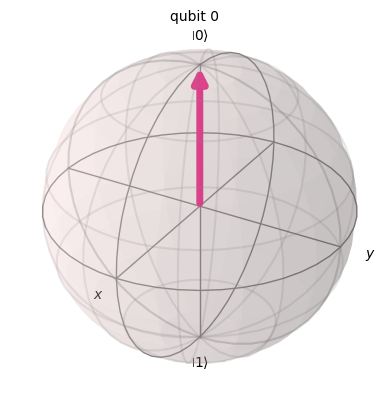

In [4]:
from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(psi1)            #theta = 0, phi = 0

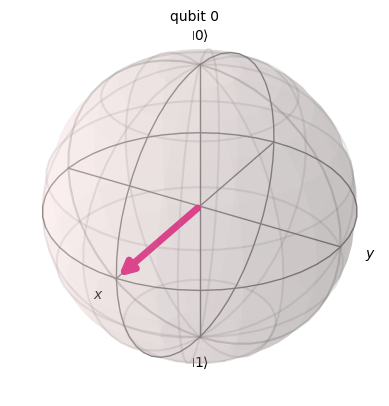

In [5]:
plot_bloch_multivector(psi2)             #theta = pi/2, phi = 0

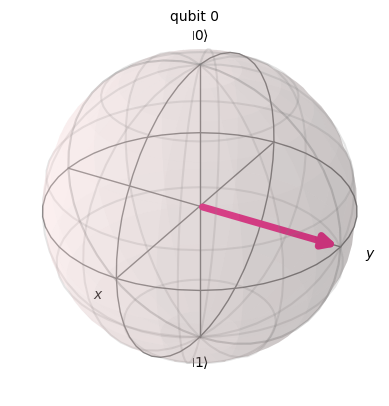

In [6]:
plot_bloch_multivector(psi3)        #theta = pi/2, phi = pi/2

# Quantum Circuits

First, we will import the functions `QuantumRegister` and `ClassicalRegister`, assigning a register to a given variable. The function's parameters are the number of qubits (bits) and a name (optional).

In [7]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(3, name='qr') # Quantum Register of 3 qubits

cr = ClassicalRegister(3, name='cr') # Classical Register of 3 bits

In [8]:
print(qr)
print(cr)

QuantumRegister(3, 'qr')
ClassicalRegister(3, 'cr')


To create a circuit, we will use the `QuantumCircuit` class. The first and second parameters correspond to the quantum and classical registers, respectively. These can be given either as objects of the type `Register`, or as integers. Similarly as before, we can give a name to the circuit.

In [9]:
from qiskit.circuit import QuantumCircuit

circuit0 = QuantumCircuit(QuantumRegister(4), ClassicalRegister(3))

circuit0_int = QuantumCircuit(4) # Four qubits and no bits

circuit = QuantumCircuit(qr, cr, name='my_circuit')

type(circuit)

qiskit.circuit.quantumcircuit.QuantumCircuit

To visualize the circuit, we use the method `QuantumCircuit.draw(output='mpl')`.

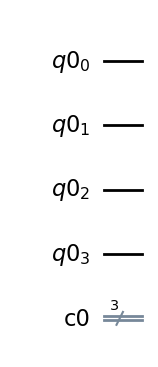

In [10]:
circuit0.draw(output='mpl') # By default, the QuantumRegister/ClassicalRegister assign the name qX/cX, 
                            # depending on how many Registers have been created.

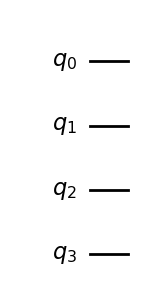

In [11]:
circuit0_int.draw(output='mpl')

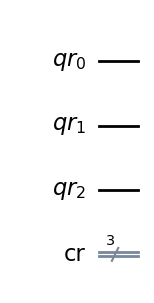

In [12]:
circuit.draw(output='mpl')

Next, we can apply different quantum gates to our circuit, which correspond to methods within the `QuantumCircuit` class. In general, the first argument correspond to the index(ices) of the qubit(s) over which the quantum gate is executed.

Observation 1: By default, Qiskit initialize each qubit in the state $|0 \rangle$.

Observation 2: To separate section between the circuit, we can use the `QuantumCircuit.barrier()` method.

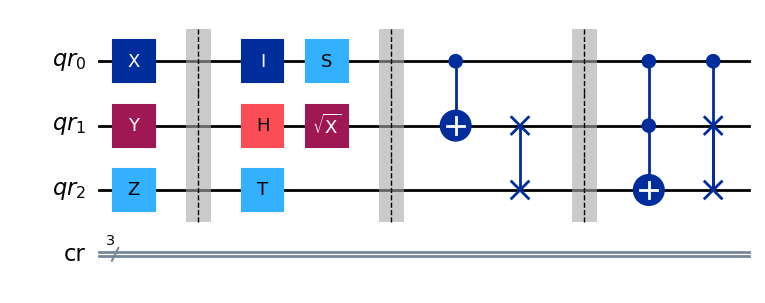

In [13]:
circuit = QuantumCircuit(qr, cr, name='my_circuit')

circuit.x(0)
circuit.y(1)    # Pauli gates, acting over the i-th qubit, resp.
circuit.z(2)

circuit.barrier()   # Barrier

circuit.id(0)   # Identity gate
circuit.h(1)    # Hadamard gate
circuit.t(2)    # T gate (also known as pi/8)
circuit.s(0)    # S gate (also known as sqrt(Z))
circuit.sx(1)   # sqrt(X) gate

circuit.barrier()

circuit.cx(0,1)     # CNOT gate (also known as CX). The first argument corresponds to the control qubit, 
                    # and the second argument corresponds to the target qubit

circuit.swap(1,2)   # SWAP gate

circuit.barrier()

circuit.ccx(0,1,2)    # Toffoli gate (also known as CXX), where the first two arguments are the control and the third is the target
circuit.cswap(0,1,2)  # Fredkin gate (also known as Controlled SWAP)

circuit.draw(output='mpl')

Remember that a quantum circuit corresponds to a quantum state, which is represented by a vector (state vector) from the corresponding Hilbert space. A useful tool to visualize the state vector of a quantum circuit is the `Statevector` [class](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector).

In [14]:
from qiskit.quantum_info import Statevector

sv = Statevector(circuit)
print(sv)

Statevector([0.+0.j        , 0.+0.70710678j, 0.+0.j        ,
             0.-0.70710678j, 0.+0.j        , 0.+0.j        ,
             0.+0.j        , 0.+0.j        ],
            dims=(2, 2, 2))


Some gates can include one or more parameters, like for example the rotation gate $R_z(\theta)$.

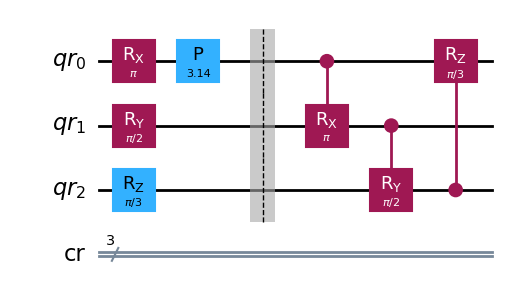

In [15]:
import numpy as np

# Instead of creating a new circuit, we can use the method .clear() to eliminate previous instructions.

circuit.clear()

circuit.rx(np.pi, 0)
circuit.ry(np.pi/2, 1)    # Rotation around the X, Y, Z axis in the Bloch sphere. The first argument corresponds to the angle of the rotation,
circuit.rz(np.pi/3, 2)    # whereas the second corresponds to the corresponding qubit.

circuit.p(3.14, 0)        # Phase gate

circuit.barrier()

circuit.crx(np.pi, 0, 1)
circuit.cry(np.pi/2, 1, 2)    # Controlled rotations around the X, Y, Z axis. The second and third arguments correspond to the
circuit.crz(np.pi/3, 2, 0)    # control and target qubits, respectively.

circuit.draw(output='mpl')

To extract the results out of a quantum circuit, it is necessary to measure each qubit and store the measurement results in the corresponding classical bits. By default, Qiskit performs measurements in the Pauli-$Z$ basis (also known as the computational basis), that is, it measures the states $|0\rangle$ or $|1\rangle$. Therefore, a measurement yields 0 or 1, depending on the overlap with the states $|0\rangle$ or $|1\rangle$.


$$
| q \rangle\xrightarrow{m e a s u r e} \begin{cases} {{0, \mathrm{w i t h ~ p r o b a b i l i t y} \, p_{0}=| \langle q | 0 \rangle|^{2},}} \\ {{1, \mathrm{w i t h ~ p r o b a b i l i t y} \, p_{1}=| \langle q | 1 \rangle|^{2}.}} \\ \end{cases}
$$


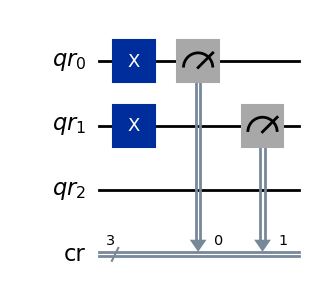

In [17]:
circuit.clear()

circuit.x(0)
circuit.x(1)
circuit.measure([0,1], [0,1]) # First argument is a list of the qubits to be measured, 
                              # and the second argument the bits to store the measurement results.

circuit.draw(output='mpl')

In a more compact manner, we can use the `QuantumCircuit.measure_all()` method. This appends a classical register by default, unless we set the input `add_bits` as `False`.

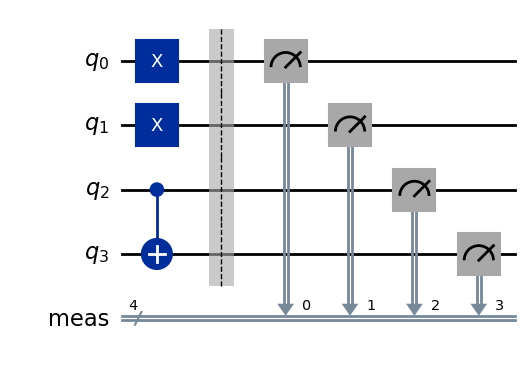

In [ ]:
circuit0_int.clear()        # this circuit has no classical register

circuit0_int.x(0)
circuit0_int.x(1)
circuit0_int.cx(2, 3)
circuit0_int.measure_all()
circuit0_int.draw(output='mpl')

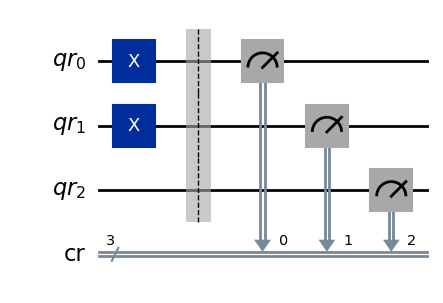

In [19]:
circuit.clear()     # this circuit already has a classical register

circuit.x(0)
circuit.x(1)
circuit.measure_all(add_bits=False)
circuit.draw(output='mpl')

Although it is not strictly necessary to define a `Register` variable, it can be practical. For example, if we are working with ancillary registers.

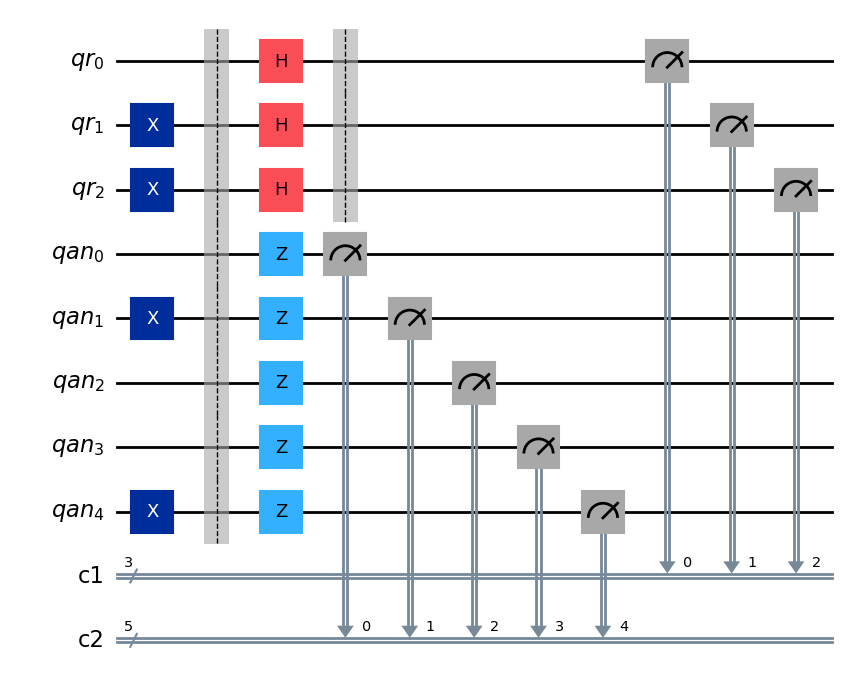

In [20]:
qr = QuantumRegister(3, name='qr')        # Quantum register
qan = QuantumRegister(5, name='qan')      # Ancillary quantum register
cr = ClassicalRegister(3)                 # Classical register
can = ClassicalRegister(5)                # Ancillary classical register

circuit = QuantumCircuit(qr, qan, cr, can)

circuit.x(qr[1])                   # X gate over the second qubit of the quantum register qr
circuit.x(qan[1])                  # X gate over the second qubit of the ancillary quantum register qan
circuit.x(qr[2])
circuit.x(qan[4])

circuit.barrier()

circuit.h(qr)                      # We can also specify a whole Register as input. In this case, 
                                   # we are applying a Hadamard gate to each qubit of the qr register

circuit.barrier(qr)                # Barrier only over the qr register
circuit.z(qan)
circuit.measure(qr, cr)            # Measure the qr register, and store the 
circuit.measure(qan, can)          # results in the corresponding classical register

circuit.draw(output='mpl')

As each quantum gate corresponds to a unitary evolution, we can consider the whole circuit as a single quantum state $|000\rangle$ undergoing a single unitary evolution $U$. In other words, we could consider the composition of all gates as a single gate, which we can obtain through the `QuantumCircuit.to_gate()` method.

This method creates a quantum gate out of the circuit, which must only qubits and contain only unitary operations (that is, no measurements).

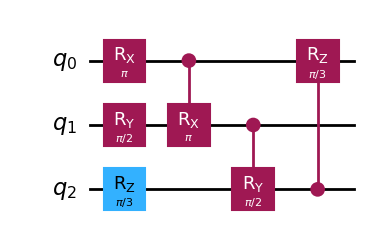

In [21]:
# lets reuse the previous circuit

circ_unitary = QuantumCircuit(3)

circ_unitary.rx(np.pi, 0)
circ_unitary.ry(np.pi/2, 1)   
circ_unitary.rz(np.pi/3, 2)    

circ_unitary.crx(np.pi, 0, 1)
circ_unitary.cry(np.pi/2, 1, 2)    
circ_unitary.crz(np.pi/3, 2, 0)   

U = circ_unitary.to_gate(label='test_gate') # Get gate from circuit

circ_unitary.draw(output='mpl')

We can append gates to a new circuit through the `QuantumCircuit.append()` method. 

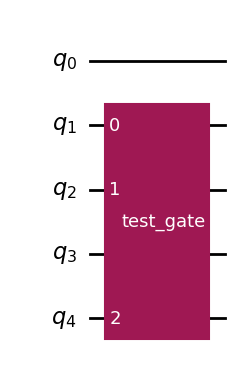

In [23]:
circuit_from_gate = QuantumCircuit(5)
circuit_from_gate.append(U, [1,2,4])            # We specify the qubits where the gate will be applied
circuit_from_gate.draw('mpl')

We can visualize the decomposition of this gate in terms of the original gates using the `QuantumCircuit.decompose()` method.

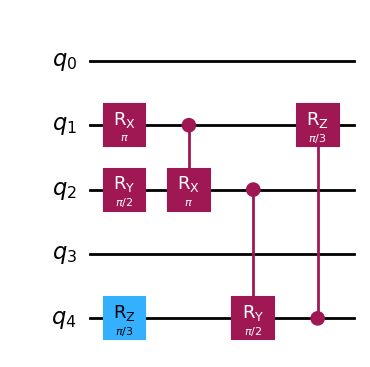

In [26]:
# reps corresponds to the number of times the decomposition will be applied
circuit_from_gate.decompose(reps=1).draw('mpl')         

The `QuantumCircuit` class has a long [list of methods](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) that we can use, which includes more than just quantum gates and measurements. Throughout the course we will explore more tools, which will allow us to create more sophisticated circuits. Similarly, a more comprehensive list of well-studied and valuable circuits and gates can be found [here](https://docs.quantum.ibm.com/api/qiskit/circuit_library).